In [1]:
require 'image'

{
  yuv2rgb : function: 0x4156a328
  rotate : function: 0x4176b088
  jetColormap : function: 0x4016b568
  savePNG : function: 0x4176b000
  savePGM : function: 0x415f64e0
  hflip : function: 0x4016b6f0
  fabio : function: 0x4156a2e0
  translate : function: 0x4176b148
  supported_filetypes : 
    {
      pgm : 
        {
          loader : function: 0x415f64b8
          sizer : function: 0x415f6500
          saver : function: 0x415f64e0
        }
      JPEG : 
        {
          loader : function: 0x4176b250
          sizer : function: 0x4176b2e0
          saver : function: 0x4176b2c0
        }
      JPG : 
        {
          loader : function: 0x4176b250
          sizer : function: 0x4176b2e0
          saver : function: 0x4176b2c0
        }
      jpg : 
        {
          loader : function: 0x4176b250
          sizer : function: 0x4176b2e0
          saver : function: 0x4176b2c0
        }
      png : 
        {
          loader : function: 0x4176af78
          sizer : function: 0x4176

    colorize : function: 0x41073648
      polar : function: 0x4157cd58
      saturate : function: 0x4157f300
      logPolar : function: 0x4157cda8
      hflip : function: 0x410735f8
      cropNoScale : function: 0x4157ce20
      vflip : function: 0x410735d0
      warp : function: 0x4157ce48
      hsv2rgb : function: 0x4157ccb8
      rgb2lab : function: 0x4157cd08
      rgb2hsl : function: 0x4157cc90
      hsl2rgb : function: 0x4157cce0
      gaussian : function: 0x410735a8
      rgb2hsv : function: 0x4157cc00
      polarBilinear : function: 0x4157cd80
      rgb2y : function: 0x4157cbd8
      logPolarBilinear : function: 0x4157cdd0
      scaleSimple : function: 0x4157f2d8
      flip : function: 0x41073620
    }
  rgb2lab : function: 0x4016b408
  decompressPNG : function: 0x4176b040
  savePPM : function: 0x4176b320
  compressJPG : function: 0x4176b300
  y2jet : function: 0x4016b468
  decompress : function: 0x4176ae08
  drawRect : function: 0x4016b4a8
  hsl2rgb : function: 0x4016b3a8
  la

In [2]:
function load_rotated_mnist(file_name, count)
  local loaded_data = {}
  for line in io.lines(file_name) do
    local chunks = {}
    for w in line:gmatch("%S+") do chunks[#chunks + 1] = tonumber(w) end
    loaded_data[#loaded_data + 1] = chunks
  end
  local loaded_data = torch.Tensor(loaded_data)
  local data = {}
  data.data = loaded_data[{{1, count}, {1, -2}}]
  data.labels = loaded_data[{{1, count}, {-1, -1}}]
  local shuffled_indices = torch.randperm(data.data:size(1)):long()
  data.data = data.data:index(1, shuffled_indices)
  data.labels = data.labels:index(1, shuffled_indices)
  data.labels:add(1)
  local real_size = math.sqrt(data.data:size(2))
  data.data = data.data:reshape(data.data:size(1), 1, real_size, real_size)
  print('--------------------------------')
  print('inputs', data.data:size())
  print('targets', data.labels:size())
  print('min target', data.labels:min())
  print('max target', data.labels:max())
  print('--------------------------------')
  return data
end

In [3]:
train_file = 'mnist_all_rotation_normalized_float_train_valid.amat'
test_file = 'mnist_all_rotation_normalized_float_test.amat'
train = load_rotated_mnist(train_file, 100)
test = load_rotated_mnist(test_file, 100)

train_data = train.data
test_data = test.data

--------------------------------	
inputs	 100
   1
  28
  28
[torch.LongStorage of size 4]

targets	 100
   1
[torch.LongStorage of size 2]

min target	1	
max target	10	
--------------------------------	


--------------------------------	
inputs	 100
   1
  28
  28
[torch.LongStorage of size 4]

targets	 100
   1
[torch.LongStorage of size 2]

min target	1	
max target	10	
--------------------------------	


In [2]:
-- datasets = 'cifar10_train_center_test_scaled_16_48.t7'
-- datasets = '/home/coldmoon/Developer/fb.resnet.torch/gen/mnist42x42_train_center_test_ST_0.7_1.2.t7'
-- datasets = '/home/coldmoon/Datasets/GTSRB/gtsrb48x48.t7'
-- datasets = '/home/coldmoon/Datasets/GTSRB/gtsrb64x64.t7'
datasets = '/home/coldmoon/Datasets/MNIST/RTS/STN-RTS.t7'
data = torch.load(datasets)
print(data)

{
  train : 
    {
      data : ByteTensor - size: 60000x1x42x42
      labels : LongTensor - size: 60000
    }
  val : 
    {
      data : ByteTensor - size: 10000x1x42x42
      labels : LongTensor - size: 10000
    }
}


In [3]:
train = data['train']
test = data['val']
train_data = train['data']
test_data =test['data']
print(train)
print(test)

{
  data : ByteTensor - size: 60000x1x42x42
  labels : LongTensor - size: 60000
}
{
  data : ByteTensor - size: 10000x1x42x42
  labels : LongTensor - size: 10000
}


In [8]:
require 'image'
for i = 1, 12630 do
    im = test_data[i]
    im = image.rotate(im, (torch.uniform() - 0.5) * 360 * math.pi / 180, 'bilinear')
    test_data[i] = im
end
    
print('done!')


bad argument #2 to '?' (out of range at /home/coldmoon/Developer/torch/pkg/torch/generic/Tensor.c:913)
stack traceback:
	[C]: at 0x7f6dac702170
	[C]: in function '__index'
	[string "require 'image'..."]:3: in main chunk
	[C]: in function 'xpcall'
	...on/Developer/torch/install/share/lua/5.1/itorch/main.lua:210: in function <...on/Developer/torch/install/share/lua/5.1/itorch/main.lua:174>
	...on/Developer/torch/install/share/lua/5.1/lzmq/poller.lua:80: in function 'poll'
	...Developer/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	...Developer/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	...Developer/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	...on/Developer/torch/install/share/lua/5.1/itorch/main.lua:389: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00405e40: 

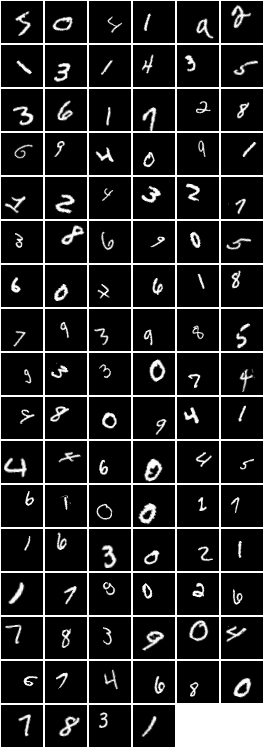

In [10]:
im = train_data[{ {1,100}, {}, {}, {}}]
itorch.image(im)

In [3]:
im = test_data[{ {2,100}, {}, {}, {}}]
itorch.image(im)

[string "im = test_data[{ {2,100}, {}, {}, {}}]..."]:1: attempt to index global 'test_data' (a nil value)
stack traceback:
	[string "im = test_data[{ {2,100}, {}, {}, {}}]..."]:1: in main chunk
	[C]: in function 'xpcall'
	...on/Developer/torch/install/share/lua/5.1/itorch/main.lua:210: in function <...on/Developer/torch/install/share/lua/5.1/itorch/main.lua:174>
	...on/Developer/torch/install/share/lua/5.1/lzmq/poller.lua:80: in function 'poll'
	...Developer/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	...Developer/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	...Developer/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	...on/Developer/torch/install/share/lua/5.1/itorch/main.lua:389: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00405e40: 